### Import libraries

In [19]:
import os
import cv2
import matplotlib.pyplot as plt

### Define file path

In [10]:
file_path = 'real_and_fake_face/training_real/'

In [11]:
profile_img= []
for face in os.listdir(file_path):
    profile_img.append(face)

In [12]:
len(profile_img)

1081

### Detect face coordinates

In [13]:
def detectFaceCoordinates(profile_img):
    face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    eye_classifier = cv2.CascadeClassifier (cv2.data.haarcascades+'haarcascade_eye.xml')
    rect_img=[]
    coordinates=[]
    annotation=[]
    temp_coordinates=[]
    count=0
 
    for i in range(0 ,len(profile_img)):
        temp_coordinates=[]
        img= cv2.imread(os.path.join(file_path,profile_img[i]))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray, scaleFactor=1.3)
        for (x,y,w,h) in faces:
            count=count+1
            img = cv2.rectangle(img, (x, y),(x+w, y+h),  (255, 0, 255), 4)
            temp_coordinates.append([(x,y,w,h)])
          #print(temp_coordinates)
        annotation.append([len(faces),temp_coordinates,profile_img[i]])
        rect_img.append(img)  

    return rect_img,annotation,temp_coordinates


In [14]:
rect_img=[]
annotation=[]
temp_coordinates=[]
rect_img,annotation,temp_coordinates= detectFaceCoordinates(profile_img)

In [15]:
myList = []
coord=[]
for (count,coordinates,filename) in annotation:
    coord=[]
    if count!= 0:
        for i in range(count):
            for coor in coordinates[i]:
                coord.append([{'x1':coor[0],'y1':coor[1],'w':coor[2],'h':coor[3]}])
    myList.append({"count":count,"coordinates":coord,"fileName":filename})


In [16]:
print("Total number of images in the image directory :",len(profile_img))
print("Total number of records in annotation file :",len(annotation))
print("Total number of records in images with bounding box : ", len(rect_img))

Total number of images in the image directory : 1081
Total number of records in annotation file : 1081
Total number of records in images with bounding box :  1081


In [17]:
myList[100]

{'count': 1,
 'coordinates': [[{'x1': 51, 'y1': 61, 'w': 486, 'h': 486}]],
 'fileName': 'real_00101.jpg'}

### Display the images with coordinates

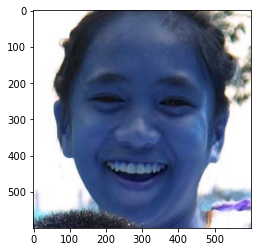

In [20]:
img= cv2.imread(os.path.join(file_path,profile_img[100]))
plt.imshow(img)

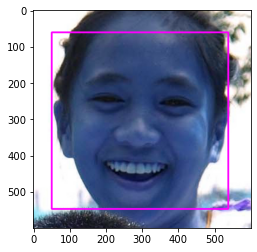

In [21]:
plt.imshow(rect_img[100])

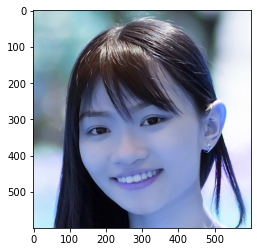

In [25]:
img= cv2.imread(os.path.join(file_path,profile_img[300]))
plt.imshow(img)

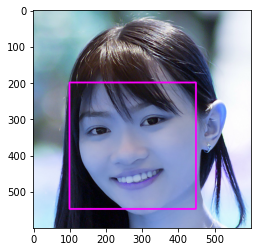

In [26]:
plt.imshow(rect_img[300])

Few challenges faced are,
1. R&D on CascadeClassifier was quite challenging
2. There were many faces in a single image and there was no faces in certain images